# One hot encoding using different libraries in python

## Using Pandas

In [1]:
# Importing required libraries
import pandas as pd # For dataframe handling and operations.
import numpy as np # For numpy array operations.

from sklearn.model_selection import train_test_split # For Dataset split.
from sklearn.preprocessing import OneHotEncoder # Object for One-hot Encoding

In [23]:
# Load the dataset
def load_data():
    data = pd.read_csv("../../data/Titanic-Dataset.csv")
    return data

data = load_data() # Variable to store the Titanic dataset used throughout the examples.

# selecting attributes from the DataFrame
data = data[['sex', 'survived']]

 #sex is input feature while survived is the target
print(data.head())

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data['sex'],
    data['survived'],
    test_size=0.3)

X_train.unique() # unique categories of sex feature

      sex  survived
0    male         0
1  female         1
2  female         1
3  female         1
4    male         0


array(['female', 'male'], dtype=object)

In [6]:
# One-hot encoding with pandas
# Use get_dummies function to generate one-hot encoded output

onehot1 = pd.get_dummies(X_train)
pd.concat([X_train, onehot1], axis=1).head()

,sex,female,male
684,male,False,True
57,male,False,True
589,male,False,True
862,female,True,False
4,male,False,True


In [7]:
# With attribute drop_first=True, k-1 dummy encoding

onehot2 = pd.get_dummies(X_train, drop_first=True)
pd.concat([X_train, onehot2], axis=1).head()

,sex,male
684,male,True
57,male,True
589,male,True
862,female,False
4,male,True


## Using Scikit-Learn

In [14]:
# One-hot encoding using Scikit-learn
onehot_encoder = OneHotEncoder(
    drop=None, # returns k dummy. for k-1 drop = first
  sparse_output=False) # returns numpy array

onehot_encoder.fit(np.array(X_train).reshape(-1,1)) #fit the training set

OneHotEncoder(sparse_output=False)

In [15]:
print('categories:', onehot_encoder.categories_)
print('Untransformed :')
print(X_test.head(6))
# Sklearn's one-hot encoder returns the numppy array or sparse matrix instead of dataframe.
print('Transformed:')
onehot_encoder.transform(np.array(X_test).reshape(-1,1))[:6]

categories: [array(['female', 'male'], dtype=object)]
Untransformed :
756      male
759    female
422      male
210      male
259    female
676      male
Name: sex, dtype: object
Transformed:


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

## Label encoding with pandas and scikit learn

In [26]:
data = pd.read_csv("../../data/Titanic-Dataset.csv")
data = data[['cabin', 'embarked', 'survived']]

data.head()

,cabin,embarked,survived
0,NaN,S,0
1,C85,C,1
2,NaN,S,1
3,C123,S,1
4,NaN,S,0


In [27]:
# taking the 1st letters from the cabin
data['cabin']=data['cabin'].str[0]
data.head()

,cabin,embarked,survived
0,NaN,S,0
1,C,C,1
2,NaN,S,1
3,C,S,1
4,NaN,S,0


In [28]:
print(data['cabin'].unique())
print(data['embarked'].unique())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['S' 'C' 'Q' nan]


In [29]:
# taking rows that are not NaN from the dataset

for col in data.columns:
    data = data[data[col].notna()]

print(data['cabin'].unique())
print(data['embarked'].unique())

['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['C' 'S' 'Q']


In [30]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin','embarked']],
    data['survived'],
    test_size=0.3,)

X_train.head()

,cabin,embarked
209,A,C
297,C,S
193,F,S
435,B,S
327,D,S


In [31]:
label_mapping = {
    key: i for i, key in enumerate(X_train['cabin'].unique())
}
print(label_mapping)

{'A': 0, 'C': 1, 'F': 2, 'B': 3, 'D': 4, 'E': 5, 'T': 6, 'G': 7}


In [32]:
# function to compute label mapping

def compute_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique())}

#function to replace the variables with label encoding

def label_encoding(train, test, variable, label_mapping):

    X_train[variable] = X_train[variable].map(label_mapping)
    X_test[variable] = X_test[variable].map(label_mapping)

In [33]:
# Label encoding for all variables
for variable in ['cabin','embarked']:
    mapping = compute_category_mappings(X_train, variable)
    label_encoding(X_train, X_test, variable, mapping)

In [34]:
X_train.head()

,cabin,embarked
209,0,0
297,1,1
193,2,1
435,3,1
327,4,1


In [35]:
# using sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin','embarked']],
    data['survived'],
    test_size=0.3,)

# LabelEncoder only takes one feature at a time
label_encoder.fit_transform(X_train['cabin']) #label encoding of train set
label_encoder.transform(X_test['cabin']) #label encoding for test set

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 4, 1, 2, 3, 4, 2, 5, 3, 3, 3, 1, 4, 4,
       2, 2, 1, 2, 3, 4, 1, 4, 0, 1, 1, 2, 1, 4, 1, 2, 6, 5, 3, 2, 1, 5,
       2, 1, 0, 3, 1, 3, 2, 4, 1, 6, 2, 2, 5, 2, 1, 3, 1])

In [36]:
from collections import defaultdict

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin','embarked']],
    data['survived'],
    test_size=0.3,)
# creating a defaultdict object.
dic = defaultdict(LabelEncoder)

In [37]:
# Encoding the training set's variable
train_label_encoded = X_train.apply(lambda x: dic[x.name].fit_transform(x))

# Encoding the test set's variable
test_label_encoded = X_test.apply(lambda x: dic[x.name].transform(x))

In [38]:
#side by side comparision
print(X_train.head())
print(train_label_encoded.head())

    cabin embarked
698     C        C
523     B        C
248     D        S
291     B        C
148     F        S
     cabin  embarked
698      2         0
523      1         0
248      3         2
291      1         0
148      5         2


## Count/Frequency Encoding

In [39]:
#loading titanic dataset
data = load_data()[['cabin', 'embarked']]
data.head()

,cabin,embarked
0,NaN,S
1,C85,C
2,NaN,S
3,C123,S
4,NaN,S


In [40]:
# taking the 1st letters from the cabin
data['cabin']=data['cabin'].str[0]

# taking rows that are not NaN from the dataset
for col in data.columns:
    data = data[data[col].notna()]

data.head()

,cabin,embarked
1,C,C
3,C,S
6,E,S
10,G,S
11,C,S


In [41]:
print(data['cabin'].value_counts())
print(data['embarked'].value_counts())

cabin
C    59
B    45
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64
embarked
S    129
C     69
Q      4
Name: count, dtype: int64


In [42]:
# count mapping function
def count_mapping(df, variable):
    return df[variable].value_counts().to_dict()
# frequency mapping function
def frequency_mapping(df, variable):
    return (df[variable].value_counts()/len(df[variable])).to_dict()
# maps the dictionary values to the dataframes column
def encoding(df, variable, mapping):
    df[variable] = df[variable].map(mapping)

In [43]:
# Count mapping

data_temp = data
for cols in data_temp.columns:
    counts = count_mapping(data_temp, cols)
    encoding(data_temp, cols, counts)


data_temp.head(10)

,cabin,embarked
1,59,69
3,59,129
6,32,129
10,4,129
11,59,129
21,33,129
23,15,129
27,59,129
31,45,69
52,33,69


In [44]:
# frequency mapping

data_temp = data

for cols in data_temp.columns:
    frequency = frequency_mapping(data_temp, cols)
    encoding(data_temp, cols, frequency)

data_temp.head(10)

,cabin,embarked
1,0.292079,0.341584
3,0.292079,0.638614
6,0.158416,0.638614
10,0.019802,0.638614
11,0.292079,0.638614
21,0.163366,0.638614
23,0.074257,0.638614
27,0.292079,0.638614
31,0.222772,0.341584
52,0.163366,0.341584


## Mean/Target Encoding

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Mean-Encoding using feature engine package
from feature_engine.encoding import MeanEncoder

data = pd.read_csv("../../data/Titanic-Dataset.csv")

data = data[['sex', 'embarked', 'survived']]

data.head()

,sex,embarked,survived
0,male,S,0
1,female,C,1
2,female,S,1
3,female,S,1
4,male,S,0


In [12]:
# lets fill the na in embarked with "Missing"
data['embarked'].fillna('Missing', inplace=True)

# lets look at the no.of unique labels
for column in data.columns:
    no_of_labels = len(data[column].unique())
    print(f"{column} : {no_of_labels} labels")

sex : 2 labels
embarked : 4 labels
survived : 2 labels


In [14]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[['sex', 'embarked', 'survived']], #keeping the target in input set
    data['survived'],
    test_size = 0.3,
    random_state = 42)

X_train.head()

,sex,embarked,survived
445,male,S,1
650,male,S,0
172,female,S,1
450,male,S,0
314,male,S,0


In [15]:
def relationship_plot(variables):
    for var in variables:
        plt.figure()
        plt.plot(X_train.groupby([var])['survived'].mean())#calculates mean of target value per variable
        plt.title(f'Relationship between {var} and Survival')
        plt.ylabel('Mean value Survival')
        plt.show()

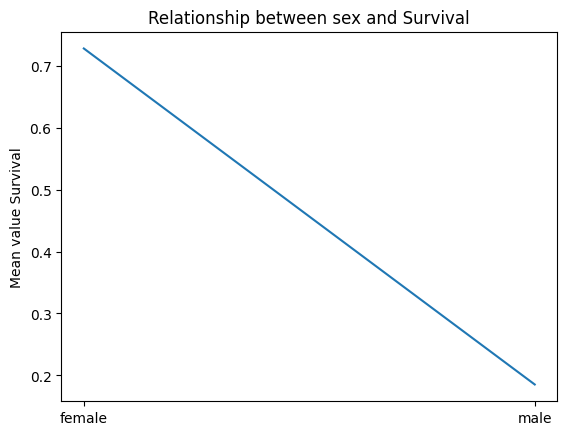

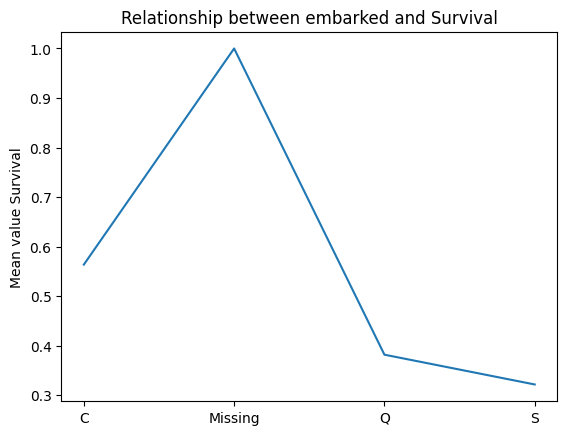

In [16]:
relationship_plot(['sex', 'embarked'])

- The relationship is montonic between sex and survival.

In [28]:
# function to compute dictionary with mean mapping
def mean_mapping(df, variable, target):
    tempdf = df.groupby([variable])[target]
    return tempdf.mean().to_dict()

def encoding(df, variable, mapping):
    df[variable] = df[variable].map(mapping)

In [29]:
# replacing labels with mean_target value per observation.

for variable in ['sex','embarked']:
    means = mean_mapping(X_train, variable, 'survived')
    encoding(X_train, variable, means)

X_train.head()

,sex,embarked,survived,sex_mean_encoded,embarked_mean_encoded
445,0.185366,0.321663,1,0.185366,0.321663
650,0.185366,0.321663,0,0.185366,0.321663
172,0.727700,0.321663,1,0.727700,0.321663
450,0.185366,0.321663,0,0.185366,0.321663
314,0.185366,0.321663,0,0.185366,0.321663


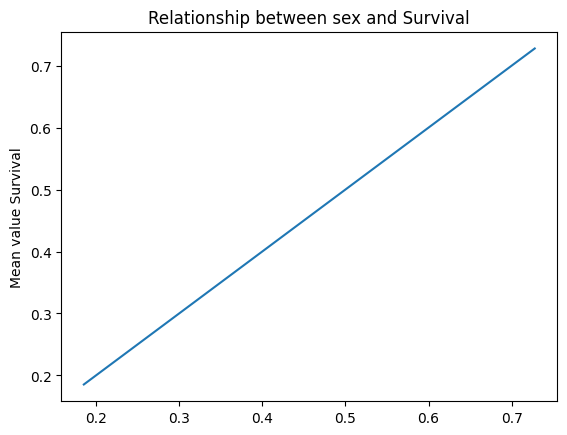

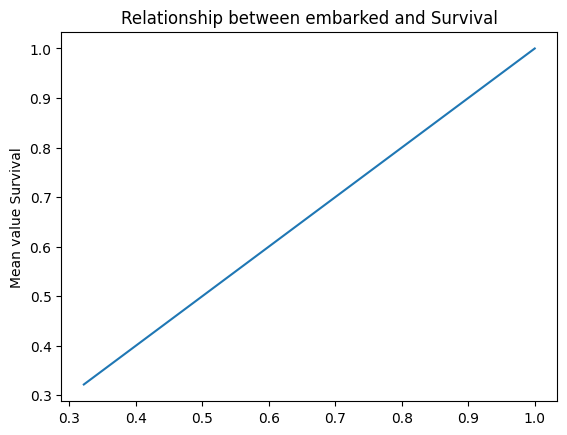

In [30]:
# lets see the relationship again, it must be converted to monotonic ones.
relationship_plot(['sex', 'embarked'])

In [31]:
# mean encoder using feature-engine
# variables attribute are the variables that need to be encoded.
mean_encoder = MeanEncoder(variables=['sex','embarked'])

# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(
    data[['sex', 'embarked']], #variables
    data['survived'], #target
    test_size = 0.3,
    random_state = 42)

mean_encoder.fit(X_train, y_train)

MeanEncoder(variables=['sex', 'embarked'])

In [32]:
X_train = mean_encoder.transform(X_train)
X_test = mean_encoder.transform(X_test)

X_train.head()

,sex,embarked
445,0.185366,0.321663
650,0.185366,0.321663
172,0.727700,0.321663
450,0.185366,0.321663
314,0.185366,0.321663
